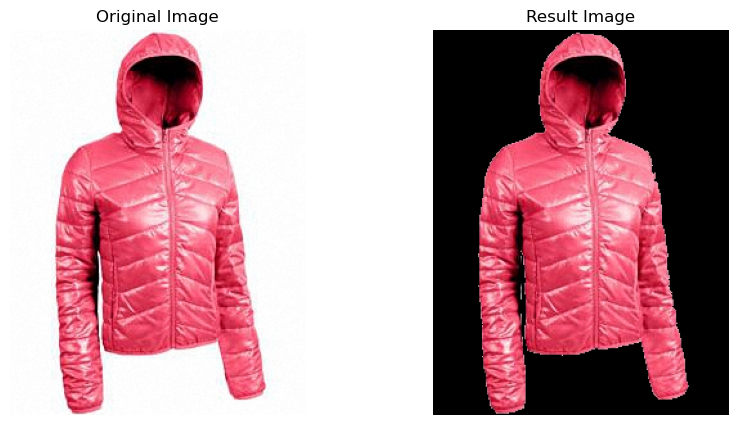

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_background(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to the image to turn it into a binary image
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Find the contours in the image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask with the same size as the original image, filled with zeros
    mask = np.zeros(img.shape[:2], dtype=np.uint8)

    # Draw the largest contour on the mask
    cv2.drawContours(mask, [largest_contour], -1, (255, 255, 255), -1)

    # Apply the mask to the original image to remove the background
    result = cv2.bitwise_and(img, img, mask=mask)
    
    return img, result

# Example usage:
image_path = "/Users/kananbedi/Downloads/cloth/jpg/img_19.jpg"
original_image, result_image = remove_background(image_path)

# Display the original and result images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Result image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Result Image')
plt.axis('off')

plt.show()

